# ***Final Assignment: Analysis of US-Mexico Border Crossing Data***

**Title: Analysis of US-Mexico Border Crossing Patterns and Their Relationship to Mexican Crime Statistics**

Spring 2025 Data Science Project

Group members: John Ng, Abhinav Verma, Vincent Huang, Andy Yu



Contributions:

Project idea: John, Abhi, Vincent, Andy
John - Find the initial datasets for Mexican crime statistics as well as U.S. border encounters.  Thought of initial themes regarding research questions and the relationship between Mexico’s crime and border encounters.

Dataset Curation and Preprocessing: John
John - Cleaned the data for the first and second checkpoints.  Removed irrelevant border encounters involving other countries and other missing data.

Data Exploration and Summary Statistics: Abhi, Andy
Abhi - I primarily did the data analysis and visualization section related to the regional differences in border encounters (bar plots, pie chart, ANOVA, post-hoc).
Andy - Prepared exploratory visualizations of both datasets using seaborn and matplotlib.

ML Algorithm Design/Development: Vincent
Vincent - Brainstorm and implement the machine learning algorithms to address some of the research questions.
ML Algorithm Training and Test Data Analysis: Vincent
Vincent - Train and analyze the results of each learning model for the final checkpoint.

Visualization, Result Analysis, Conclusion: Andy
Andy - Created data visualizations for initial exploration and summary statistics stages. Also created visualizations of linear regression.

Final Tutorial Report Creation: John
John - Extracted final insights as well as real-life applications to our conclusions on the ML models.

Additional (Formatting, writeups, etc): Abhi, Andy
Abhi - I completed the final review of the project by formatting to meet the rubric requirements, writing the introduction and data curation sections, as well as writing intermediate paragraph for greater depth when needed.
Andy - Proofread for formatting, etc.

# ***Introduction***

The main purpose of this project is to guide you through the complete data science pipeline. To accomplish this, we chose to focus on the relationship between crime in Mexico and the number of Mexican nationals encountered at the U.S. border. Immigration has long been a hot-button issue in the United States, and recent years have seen increased attention on the causes behind migration flows - ranging from economic instability to political unrest and, notably, public safety concerns in home countries.

While immigration policy is often shaped by political narratives, we wanted to explore the data behind a key driver of migration: crime. Specifically, we asked "does higher crime rates in Mexico correlate with an increase in U.S. border crossings?" Using publicly available datasets, we aim to analyze trends in criminal activity and compare them with documented encounters at the border to uncover possible links.

Why is this important? Border policy decisions affect millions of people on both sides of the US-Mexico border. By understanding the social and criminal factors that may contribute to migration, we can gain insight into why people risk their lives to cross the border. This information can help policymakers, humanitarian organizations, and communities make more informed, evidence-based decisions.

Throughout this tutorial, we will walk through the Data Science Lifecycle as follows: data collection and preprocessing, exploratory analysis, model selection and training, visualization, and final insights. Our findings will shed light on how crime statistics in Mexico may be used as indicators for migration behavior across the southern US border.

# ***Data curation***

To conduct our analysis, we curated data from two primary sources:

Mexican Crime Statistics (2015-2023)

Source:
Kaggle - Official Crime Stats Mexico
https://www.kaggle.com/datasets/elanderos/official-crime-stats-mexico-2015-2023

* This dataset includes detailed crime records reported throughout Mexico from 2015 to 2023. The data encompasses various dimensions such as the type of crime (e.g., homicide, kidnapping, robbery), affected demographics (e.g., age group, gender), and temporal patterns (monthly/yearly frequency). These records offer a comprehensive view of criminal activity across different regions in Mexico.



U.S. Border Encounter Statistics

Sources:
Kaggle - Border Crossing Dataset
https://www.kaggle.com/datasets/sahirmaharajj/border-crossing-dataset
U.S. Customs and Border Protection (CBP)
https://www.cbp.gov/document/stats/nationwide-encounters

* These datasets provide statistics on U.S. border encounters, specifically the number of Mexican nationals apprehended or encountered at the southern U.S. border. Data spans across years and is segmented by location, date, and encounter type (e.g., apprehensions, expulsions).



# ***Data Preprocessing***

Before beginning analysis, we cleaned and formatted the datasets to ensure consistency and usability - performing Data Cleaning, Formatting, and Integration.


*Data Integration:*

After cleaning and aggregating both datasets, we aligned them temporally by year. This enabled us to create a unified pandas DataFrame that paired Mexican state-level crime statistics with U.S. border encounter statistics for the corresponding years. This structure facilitated direct comparison and correlation analysis.

Import helpful statistical libraries/modules for data preprocessing, exploration, and primary analysis.

In [32]:
import pandas as pd
import requests
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import string
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


Importing the data set. We are using a dataset containing data of encounters of individuals attempting to cross the US border from various countries, but we will process/clean this to include only data from Mexico as that is our focus for this project.

In [33]:
border_crossing_df = pd.read_csv("nationwide-encounters-fy22-fy25-dec-aor.csv")
border_crossing_df

,Fiscal Year,Month Grouping,Month (abbv),Component,Land Border Region,Area of Responsibility,AOR (Abbv),Demographic,Citizenship,Title of Authority,Encounter Type,Encounter Count
0,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Accompanied Minors,CANADA,Title 42,Expulsions,1
1,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,BRAZIL,Title 8,Inadmissibles,17
2,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,CANADA,Title 8,Inadmissibles,26
3,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,"CHINA, PEOPLES REPUBLIC OF",Title 8,Inadmissibles,2
4,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,COLOMBIA,Title 8,Inadmissibles,16
...,...,...,...,...,...,...,...,...,...,...,...,...
49805,2025 (FYTD),FYTD,OCT,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,UC / Single Minors,HONDURAS,Title 8,Apprehensions,3
49806,2025 (FYTD),FYTD,OCT,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,UC / Single Minors,MEXICO,Title 8,Apprehensions,100
49807,2025 (FYTD),FYTD,OCT,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,UC / Single Minors,NICARAGUA,Title 8,Apprehensions,2
49808,2025 (FYTD),FYTD,OCT,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,UC / Single Minors,OTHER,Title 8,Apprehensions,3


Checking data types

In [34]:
border_crossing_df.dtypes

,0
Fiscal Year,object
Month Grouping,object
Month (abbv),object
Component,object
Land Border Region,object
Area of Responsibility,object
AOR (Abbv),object
Demographic,object
Citizenship,object
Title of Authority,object


*Data Cleaning:*

We handled missing or incomplete entries by removing or imputing them based on contextual logic. Duplicates were dropped, and string-based categorical values were standardized to maintain uniformity.

Convert Fiscal Year column to int

In [35]:
border_crossing_df['Fiscal Year'] = border_crossing_df['Fiscal Year'].str.extract(r'(\d+)')
border_crossing_df['Fiscal Year'] = border_crossing_df['Fiscal Year'].astype(int)

Determining the different regions reported for border crossing

In [36]:
border_crossing_df['Land Border Region'].value_counts()

,count
Land Border Region,
Southwest Land Border,23184
Other,17253
Northern Land Border,9373


The table and graph below visualizes the citizenships of individuals crossing the border. We can see that the most common country, excluding the "Other" category, of individuals crossing the border, is Mexico. Since we're focusing on the relationship between Mexican crime statistics and border crossings, we will only be dealing with encounters of Mexican citizens.

,count
Citizenship,
OTHER,4254
MEXICO,4111
GUATEMALA,2921
VENEZUELA,2846
COLOMBIA,2818
HONDURAS,2811
EL SALVADOR,2542
CUBA,2387
NICARAGUA,2382


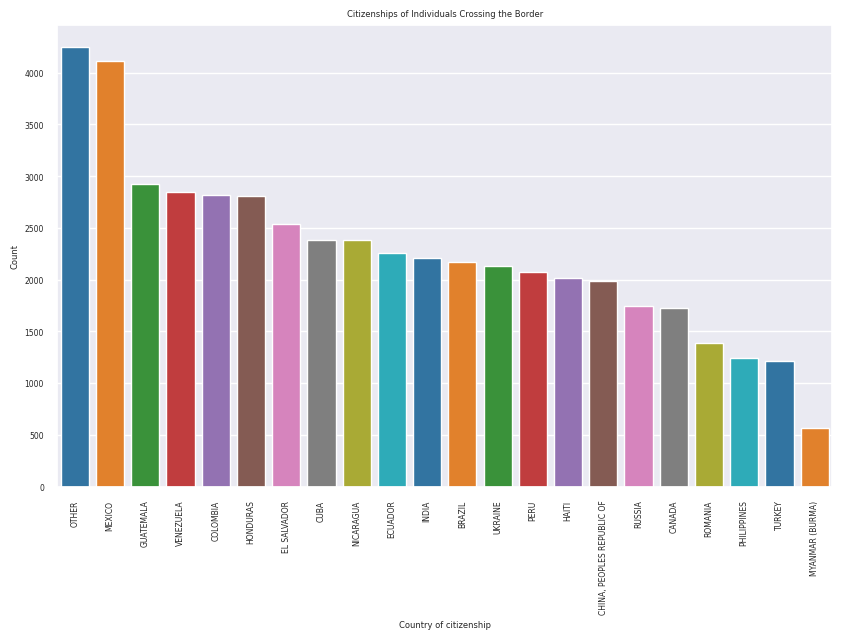

In [37]:
citizenships = border_crossing_df['Citizenship'].value_counts()
display(citizenships)

plt.figure(figsize=(10, 6))
sns.barplot(x = citizenships.index, y=citizenships, hue=citizenships.index, palette='tab10')
plt.xlabel("Country of citizenship")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Citizenships of Individuals Crossing the Border")

plt.show()




In [38]:
border_crossing_df = border_crossing_df[border_crossing_df['Citizenship'] == 'MEXICO']
border_crossing_df

,Fiscal Year,Month Grouping,Month (abbv),Component,Land Border Region,Area of Responsibility,AOR (Abbv),Demographic,Citizenship,Title of Authority,Encounter Type,Encounter Count
6,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,MEXICO,Title 8,Inadmissibles,9
19,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,MEXICO,Title 8,Inadmissibles,21
37,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Buffalo Field Office,Buffalo,Accompanied Minors,MEXICO,Title 42,Expulsions,3
73,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Buffalo Field Office,Buffalo,Single Adults,MEXICO,Title 42,Expulsions,24
74,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Buffalo Field Office,Buffalo,Single Adults,MEXICO,Title 8,Inadmissibles,14
...,...,...,...,...,...,...,...,...,...,...,...,...
49753,2025,FYTD,OCT,U.S. Border Patrol,Southwest Land Border,Tucson Sector,TCA,Single Adults,MEXICO,Title 8,Apprehensions,4242
49767,2025,FYTD,OCT,U.S. Border Patrol,Southwest Land Border,Tucson Sector,TCA,UC / Single Minors,MEXICO,Title 8,Apprehensions,690
49779,2025,FYTD,OCT,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,FMUA,MEXICO,Title 8,Apprehensions,937
49794,2025,FYTD,OCT,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,Single Adults,MEXICO,Title 8,Apprehensions,523


Load the Mexico crime database

In [39]:
mexico_crime_df = pd.read_csv("mexico_crime.csv")
mexico_crime_df

,year,entity_code,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,month,count
0,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,January,3
1,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,January,1
2,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With another element,January,0
3,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,January,2
4,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With firearm,January,0
...,...,...,...,...,...,...,...,...,...
332411,2022,32,Zacatecas,Other legal interests affected (from common law),Counterfeiting,Forgery,Forgery,December,8
332412,2022,32,Zacatecas,Other legal interests affected (from common law),Environmental crimes,Environmental crimes,Against the environment,December,1
332413,2022,32,Zacatecas,Other legal interests affected (from common law),Crimes committed by public officials,Crimes committed by public servants,Crimes committed by public servants,December,20
332414,2022,32,Zacatecas,Other legal interests affected (from common law),Electoral crimes,Electoral crimes,Electoral crimes,December,0


Check the types of the Mexico crime columns

In [40]:
mexico_crime_df.dtypes

,0
year,int64
entity_code,int64
entity,object
affected_legal_good,object
type_of_crime,object
subtype_of_crime,object
modality,object
month,object
count,int64


Determine the earliest and latest year for both databases

In [41]:
earliest_year = max(border_crossing_df['Fiscal Year'].min(), mexico_crime_df['year'].min())
latest_year = min(border_crossing_df['Fiscal Year'].max(), mexico_crime_df['year'].max())
print(f'Earliest Possible Reported Year: {earliest_year}')
print(f'Latest Possible Reported Year: {latest_year}')

Earliest Possible Reported Year: 2022
Latest Possible Reported Year: 2023


We will be focusing on the data between 2022 and 2023 so we'll drop all other entries in both databases.

In [42]:
border_crossing_df = border_crossing_df[
    (border_crossing_df['Fiscal Year'] >= earliest_year) &
    (border_crossing_df['Fiscal Year'] <= latest_year)
    ]
mexico_crime_df = mexico_crime_df[
    (mexico_crime_df['year'] >= earliest_year) &
    (mexico_crime_df['year'] <= latest_year)
    ]
display(border_crossing_df)
display(mexico_crime_df)



,Fiscal Year,Month Grouping,Month (abbv),Component,Land Border Region,Area of Responsibility,AOR (Abbv),Demographic,Citizenship,Title of Authority,Encounter Type,Encounter Count
6,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,MEXICO,Title 8,Inadmissibles,9
19,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,MEXICO,Title 8,Inadmissibles,21
37,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Buffalo Field Office,Buffalo,Accompanied Minors,MEXICO,Title 42,Expulsions,3
73,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Buffalo Field Office,Buffalo,Single Adults,MEXICO,Title 42,Expulsions,24
74,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Buffalo Field Office,Buffalo,Single Adults,MEXICO,Title 8,Inadmissibles,14
...,...,...,...,...,...,...,...,...,...,...,...,...
31292,2023,Remaining,SEP,U.S. Border Patrol,Southwest Land Border,Tucson Sector,TCA,Single Adults,MEXICO,Title 8,Apprehensions,5282
31304,2023,Remaining,SEP,U.S. Border Patrol,Southwest Land Border,Tucson Sector,TCA,UC / Single Minors,MEXICO,Title 8,Apprehensions,868
31317,2023,Remaining,SEP,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,FMUA,MEXICO,Title 8,Apprehensions,79
31331,2023,Remaining,SEP,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,Single Adults,MEXICO,Title 8,Apprehensions,356


,year,entity_code,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,month,count
21952,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,January,3
21953,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,January,3
21954,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With another element,January,0
21955,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,January,0
21956,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With firearm,January,0
...,...,...,...,...,...,...,...,...,...
332411,2022,32,Zacatecas,Other legal interests affected (from common law),Counterfeiting,Forgery,Forgery,December,8
332412,2022,32,Zacatecas,Other legal interests affected (from common law),Environmental crimes,Environmental crimes,Against the environment,December,1
332413,2022,32,Zacatecas,Other legal interests affected (from common law),Crimes committed by public officials,Crimes committed by public servants,Crimes committed by public servants,December,20
332414,2022,32,Zacatecas,Other legal interests affected (from common law),Electoral crimes,Electoral crimes,Electoral crimes,December,0


In [43]:
border_crossing_df.reset_index(drop=True, inplace=True)
mexico_crime_df.reset_index(drop=True, inplace=True)
display(border_crossing_df)
display(mexico_crime_df)



,Fiscal Year,Month Grouping,Month (abbv),Component,Land Border Region,Area of Responsibility,AOR (Abbv),Demographic,Citizenship,Title of Authority,Encounter Type,Encounter Count
0,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,MEXICO,Title 8,Inadmissibles,9
1,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,MEXICO,Title 8,Inadmissibles,21
2,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Buffalo Field Office,Buffalo,Accompanied Minors,MEXICO,Title 42,Expulsions,3
3,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Buffalo Field Office,Buffalo,Single Adults,MEXICO,Title 42,Expulsions,24
4,2022,FYTD,DEC,Office of Field Operations,Northern Land Border,Buffalo Field Office,Buffalo,Single Adults,MEXICO,Title 8,Inadmissibles,14
...,...,...,...,...,...,...,...,...,...,...,...,...
2749,2023,Remaining,SEP,U.S. Border Patrol,Southwest Land Border,Tucson Sector,TCA,Single Adults,MEXICO,Title 8,Apprehensions,5282
2750,2023,Remaining,SEP,U.S. Border Patrol,Southwest Land Border,Tucson Sector,TCA,UC / Single Minors,MEXICO,Title 8,Apprehensions,868
2751,2023,Remaining,SEP,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,FMUA,MEXICO,Title 8,Apprehensions,79
2752,2023,Remaining,SEP,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,Single Adults,MEXICO,Title 8,Apprehensions,356


,year,entity_code,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,month,count
0,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,January,3
1,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,January,3
2,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With another element,January,0
3,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,January,0
4,2022,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With firearm,January,0
...,...,...,...,...,...,...,...,...,...
68987,2022,32,Zacatecas,Other legal interests affected (from common law),Counterfeiting,Forgery,Forgery,December,8
68988,2022,32,Zacatecas,Other legal interests affected (from common law),Environmental crimes,Environmental crimes,Against the environment,December,1
68989,2022,32,Zacatecas,Other legal interests affected (from common law),Crimes committed by public officials,Crimes committed by public servants,Crimes committed by public servants,December,20
68990,2022,32,Zacatecas,Other legal interests affected (from common law),Electoral crimes,Electoral crimes,Electoral crimes,December,0


The graph below shows the number of occurrences of crimes of individuals crossing the border. The most common type of crime is robbery, following injuries, homicide, and kidnapping.

<ipython-input-44-beb42d1cb26f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mexico_crime_df, y='type_of_crime', order=crime_count.index, palette='viridis')


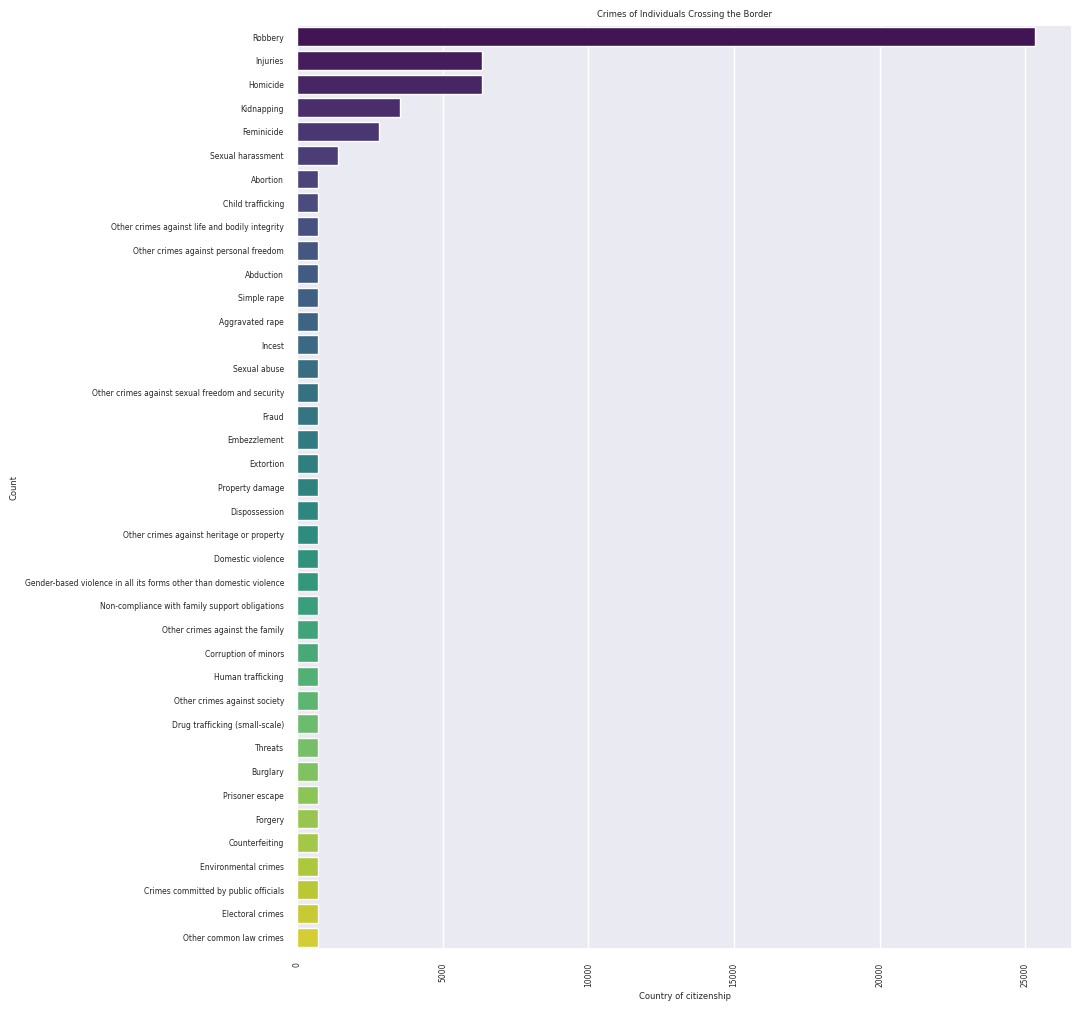

In [44]:
plt.figure(figsize=(10, 12))
crime_count = mexico_crime_df['type_of_crime'].value_counts()
sns.countplot(data=mexico_crime_df, y='type_of_crime', order=crime_count.index, palette='viridis')
plt.xlabel("Country of citizenship")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Crimes of Individuals Crossing the Border")

plt.show()


Basic Data Exploration

Dataset Overview

In [45]:
print("Mexican Border Crossings Dataset Shape:", border_crossing_df.shape)
print("\nFirst 5 Rows:")
print(border_crossing_df.head())


Mexican Border Crossings Dataset Shape: (2754, 12)

First 5 Rows:
   Fiscal Year Month Grouping Month (abbv)                   Component  \
0         2022           FYTD          DEC  Office of Field Operations   
1         2022           FYTD          DEC  Office of Field Operations   
2         2022           FYTD          DEC  Office of Field Operations   
3         2022           FYTD          DEC  Office of Field Operations   
4         2022           FYTD          DEC  Office of Field Operations   

     Land Border Region Area of Responsibility AOR (Abbv)         Demographic  \
0  Northern Land Border    Boston Field Office     Boston                FMUA   
1  Northern Land Border    Boston Field Office     Boston       Single Adults   
2  Northern Land Border   Buffalo Field Office    Buffalo  Accompanied Minors   
3  Northern Land Border   Buffalo Field Office    Buffalo       Single Adults   
4  Northern Land Border   Buffalo Field Office    Buffalo       Single Adults   

  

The plot below shows the number of border crossing occurrences each month. We ssee that slightly more border crossing incidents happen in the winter and spring months, and less in the summer months. This hypothesis will be further tested in the machine learning section.

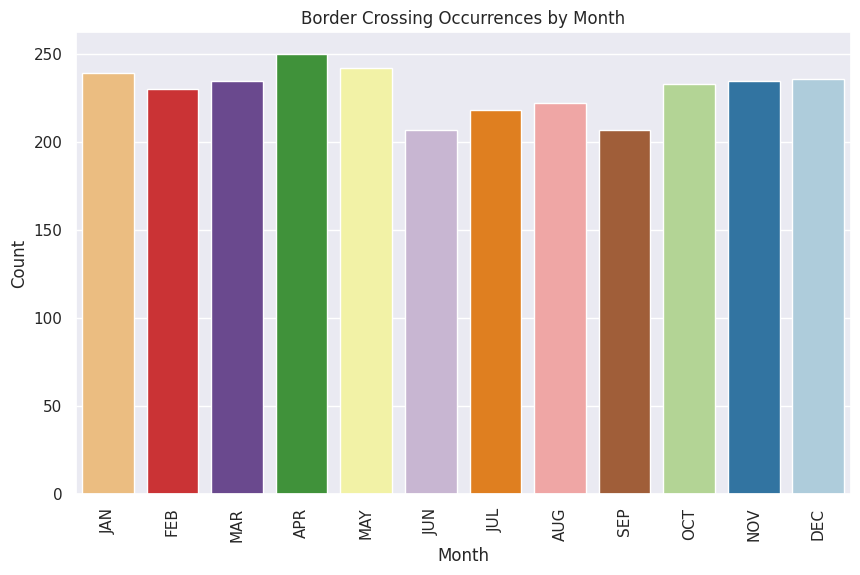

In [46]:
sns.set()
plt.figure(figsize=(10, 6))

sns.countplot(data=border_crossing_df, x='Month (abbv)', hue='Month (abbv)', palette='Paired',
              order=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
plt.xlabel("Month")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Border Crossing Occurrences by Month")

plt.show()

Summary Statistics

In [47]:
print(border_crossing_df.describe(include='all'))

        Fiscal Year Month Grouping Month (abbv)                   Component  \
count   2754.000000           2754         2754                        2754   
unique          NaN              2           12                           2   
top             NaN      Remaining          APR  Office of Field Operations   
freq            NaN           2050          250                        1443   
mean    2022.483660            NaN          NaN                         NaN   
std        0.499824            NaN          NaN                         NaN   
min     2022.000000            NaN          NaN                         NaN   
25%     2022.000000            NaN          NaN                         NaN   
50%     2022.000000            NaN          NaN                         NaN   
75%     2023.000000            NaN          NaN                         NaN   
max     2023.000000            NaN          NaN                         NaN   

           Land Border Region Area of Responsibilit

Check for missing values

In [48]:
print(border_crossing_df.isnull().sum())

Fiscal Year               0
Month Grouping            0
Month (abbv)              0
Component                 0
Land Border Region        0
Area of Responsibility    0
AOR (Abbv)                0
Demographic               0
Citizenship               0
Title of Authority        0
Encounter Type            0
Encounter Count           0
dtype: int64


We can see that there doesn't seem to be any null values found, so the dataset is good on missing values.

# ***Data Exploration and Summary Statistics***

Distribution of Mexican Encounters by Region
# Hypothesis: The Southwest Land Border has significantly more Mexican encounters than other regions


Group by region and sum encounters

<ipython-input-49-d5d9e511fc11>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


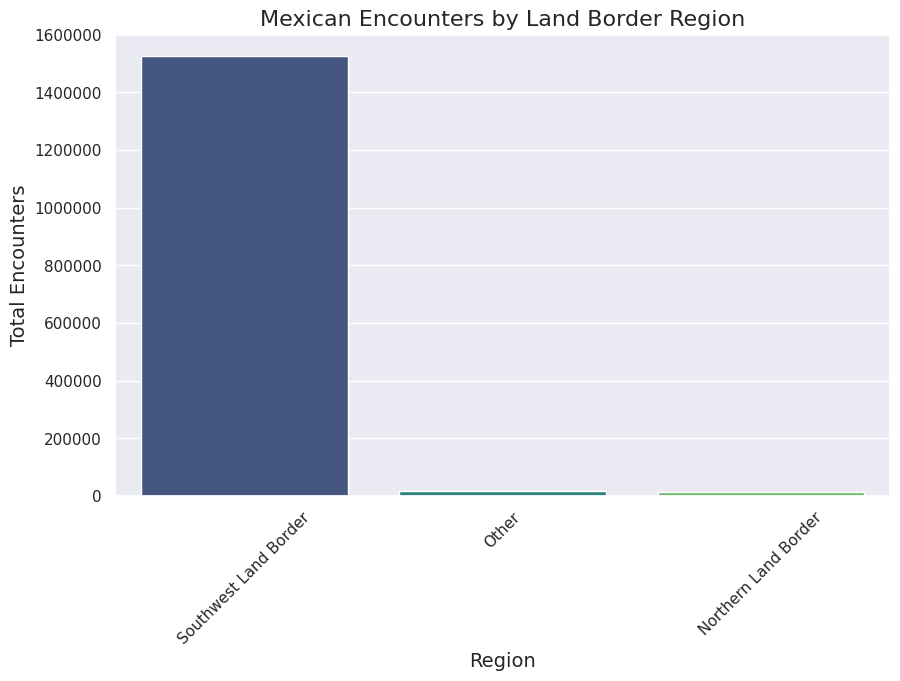

In [49]:
region_counts = border_crossing_df.groupby('Land Border Region')['Encounter Count'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title('Mexican Encounters by Land Border Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Encounters', fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**Conclusion:**

From a quick check of grouping total encounters counts across the border by regions and visualizing as a bar chart, we can see that there seems to be a correlation with border crossings and region, with the region of the Southwest Land Border making up the majority of the crossings. On the other hand, it seems like Northern Land Border and other regions seem to be marginal compared to the Southwest Land Border which seems to be where the majority of total border crossings from Mexico to the United States occur.

From this, we can infer that its possible that the Southwest Land Border region could be closer to the United States and/or easier and more accessible when it comes to crossing. Or it could also hint at lack of border security in that region which is why there are more crossings there. In any case, it seems that if future policy making on border control most likely would need focus on the Southwest Land Border regions given the number of cases of border crossing that occur there.

Distribution of Border Crossings by Encounter Type (Pie Chart)


=== Encounter Type Distribution ===


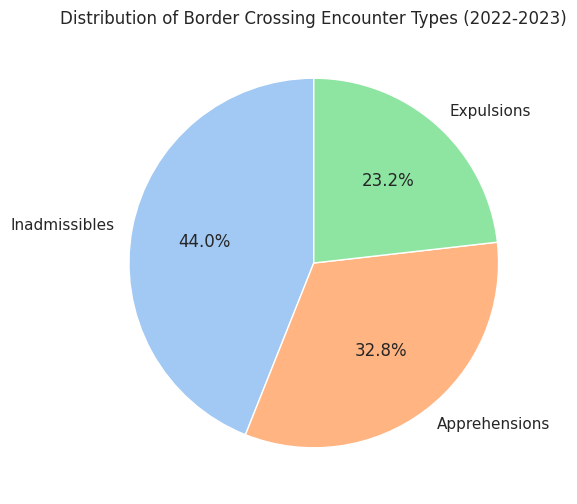

In [50]:
print("\n=== Encounter Type Distribution ===")
encounter_counts = border_crossing_df['Encounter Type'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(encounter_counts, labels=encounter_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Border Crossing Encounter Types (2022-2023)')
plt.show()

Statistical tests for encounter type distribution

Statistical test (ANOVA)

In [51]:
regions = border_crossing_df['Land Border Region'].unique()
region_groups = [border_crossing_df[border_crossing_df['Land Border Region'] == r]['Encounter Count'] for r in regions]

f_stat, p_value = stats.f_oneway(*region_groups)
print(f"\nANOVA Test for Regional Differences: F-statistic={f_stat:.2f}, p-value={p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: There are significant differences in Mexican encounters between regions")

    # Post-hoc
    data = pd.concat([
        pd.DataFrame({'region': r, 'count': border_crossing_df[border_crossing_df['Land Border Region'] == r]['Encounter Count']})
        for r in regions
    ])

    tukey = pairwise_tukeyhsd(data['count'], data['region'], alpha=0.05)
    print("\nPost-hoc Tukey HSD Test:")
    print(tukey)
else:
    print("Conclusion: No significant differences found between regions for Mexican encounters")


ANOVA Test for Regional Differences: F-statistic=104.88, p-value=0.0000
Conclusion: There are significant differences in Mexican encounters between regions

Post-hoc Tukey HSD Test:
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
       group1                group2        meandiff p-adj    lower     upper   reject
-------------------------------------------------------------------------------------
Northern Land Border                 Other   1.7127 0.9998 -232.3258  235.7513  False
Northern Land Border Southwest Land Border 959.5553    0.0  757.2745 1161.8361   True
               Other Southwest Land Border 957.8426    0.0  770.8327 1144.8525   True
-------------------------------------------------------------------------------------


**Conclusion:**

Since we are trying to compare the encounters among three different groups, we use the ANOVA test since it is helpful for when comparing and working with more than two groups of data. As seen by the ANOVA test result, there is a very low p-value and the F-statistic, we see that there is a statistically significant difference in the mean encounter counts between different regions. Thus, we have strong evidence to reject the null hypothesis which states that there are little or no differences among regions when it comes to total encounter counts.

Since the ANOVA test only tells us if there are are differences in encounter counts among the three regions but not where those differences lie, we use an additional statistical test, the Post-Hoc Tukey HSD test, to determine where those differences lie. In particular, we see that Northern Land Border and Other regions (which do not include Southwest Land Border) seem to not have a significant difference given the high p-value of 0.9998 while both the Northern Land Border and Other regions are significantly different from the Southwest Land Border with both groups having a p-value of 0 when paired and compared with the Southwest Land Border. This is also further supported when looking at the low mean difference when regions excluding the Southwest Land Border are exluded and the high mean difference whenever the region of Southwest Land Border is compared.

Thus, when taking into our observation from our visualization made previously on encounters count and regions plus our statistical analysis, we know that not only are most border crossings occuring at the Southwest Land Border but also that the Northwest Land Border and other regions are very similar, so these statistical tests give us further evidence and reasons to support the suggestion made in our previous conclusion that policy making on border control may need to focus more on the Southwest Land Border region.

Differences in Encounter Types for Mexican Citizens
# Hypothesis: Certain encounter types are more common for Mexican citizens

<ipython-input-52-dfeb7379da6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=encounter_type_counts.index, y=encounter_type_counts.values, palette="mako")


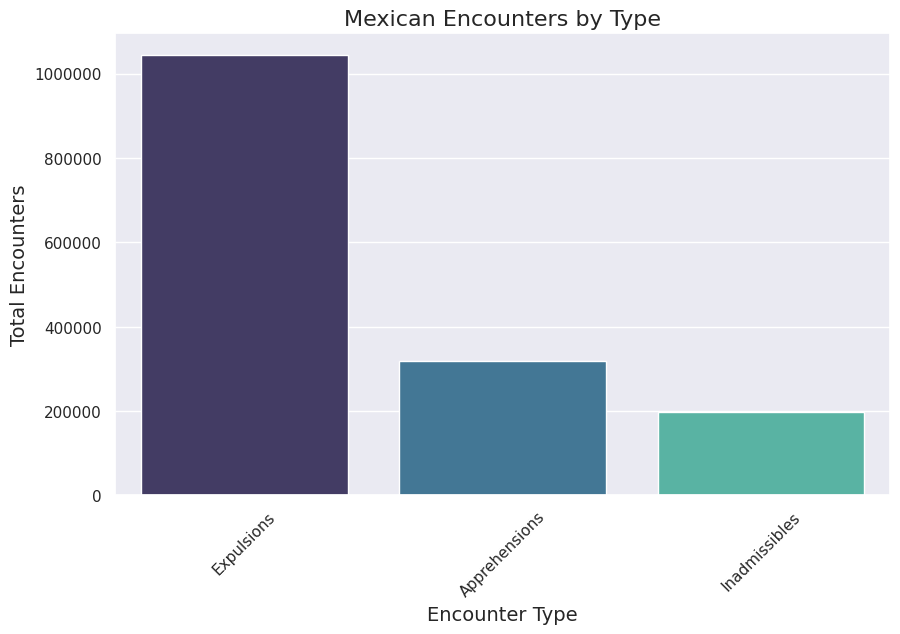


Chi-square Test for Encounter Types: χ²=803976.75, p-value=0.0000
Conclusion: Encounter types for Mexican citizens are not equally distributed


In [52]:
encounter_type_counts = border_crossing_df.groupby('Encounter Type')['Encounter Count'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=encounter_type_counts.index, y=encounter_type_counts.values, palette="mako")
plt.title('Mexican Encounters by Type', fontsize=16)
plt.xlabel('Encounter Type', fontsize=14)
plt.ylabel('Total Encounters', fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Chi-square test
observed = encounter_type_counts.values
expected = np.ones_like(observed) * observed.mean()

chi2, p = stats.chisquare(observed, expected)
print(f"\nChi-square Test for Encounter Types: χ²={chi2:.2f}, p-value={p:.4f}")

if p < 0.05:
    print("Conclusion: Encounter types for Mexican citizens are not equally distributed")
else:
    print("Conclusion: No significant difference in encounter type frequencies for Mexican citizens")

**Conclusion:**

Since we are trying to compare groups of data (Expulsions, Apprehensions, Inadmissibles), we chose to use Chi-Squared as our statistical test since its useful for dealing and comparing categorical data.

From our statistical test, the p-value is low meaning that we have lots of evidence against our null hypothesis which is that there is no particular differences in the number of encounters among all the encounter types. So given our statistical test and the resulting low p-value, we can infer that the encounter types are not evenly distributed.

In addition, as we can see in our bar graph visualization, we can confirm that our hypothesis (that the total number of encounters for each encounter type is not evenly distributed and are different) is correct.

In particular, we can see that the highest cases of encounter types are expulsions meaning that most people who have attempted crossing over from Mexico to the United States (the ones that are most likely illegally crossing given their removal) end up being removed from the United States after they cross over rather than arrested before they cross or rather than being denied at the port of entry. This implies that either border control is either more lenient in allowing people from Mexico cross over to the United States and more strict when it comes to letting them stay in the United States or that there may be vulnerabilities in border security and that there are lots of people from Mexico who are able to cross without getting stopped or seen by border control and security. Depending on which is the case, it could hint at whether or not a more thorough border security process should be implemented to prevent illegal crossing.

# **Primary Analysis**

So our goal will be to answer some of the questions we posed in Checkpoint 1 using machine learning techniques to extract insight for this.


The questions we aim to answer are:
- Whether increases in crime in specific regions correlate with changes in migration patterns.
- How different types of crimes impact border crossing activity.
- Seasonal or policy-driven trends that may influence both crime rates and cross-border movement.


**Understanding relationship between crime and migration patterns**

We decided to use regression analysis as a way to be able to better understand how crime influences migration patterns which is something related to the questions we posed. Regression analysis allows us to quantify the relationship between different types of crime in Mexico, and the number of monthly border encounters involving Mexican nationals. We use the reported crime counts as the input features, and the migration volume as the output variable, and by doing this we should be able to determine which crimes have the strongest predictive power. Our goal of using regression analysis will be to hopefully be able to uncover whether increases in certain crimes—such as violence, corruption, or property offenses—are associated with spikes in migration, and whether specific patterns emerge that could inform policy or humanitarian responses.

We performed the following steps:

Filtered migration data to include only Mexican nationals and aggregated it by month.

Transformed crime data into a pivoted format, where each crime type became a separate feature column.

Merged both datasets on date to align time-based patterns.

Built a linear regression model using crime types as predictors and migration volume as the target.

In [53]:
crime_df = pd.read_csv("mexico_crime.csv")
migration_df = pd.read_csv("nationwide-encounters-fy22-fy25-dec-aor.csv")

# Filter migration data for Mexican citizens only
migration_df_mexico = migration_df[migration_df["Citizenship"].str.upper() == "MEXICO"].copy()

# Create Date column
migration_df_mexico["Date"] = pd.to_datetime(
    migration_df_mexico["Fiscal Year"].astype(str) + "-" + migration_df_mexico["Month (abbv)"],
    format="%Y-%b", errors="coerce"
)
migration_df_mexico = migration_df_mexico.dropna(subset=["Date"])

# Aggregate migration data
migration_agg = migration_df_mexico.groupby("Date")["Encounter Count"].sum().reset_index()
migration_agg.rename(columns={"Encounter Count": "Total Encounters"}, inplace=True)

# Pivot crime data to get crime types as columns
# Create Date column
crime_df["Date"] = pd.to_datetime(
    crime_df["year"].astype(str) + "-" + crime_df["month"].astype(str), errors="coerce"
)
crime_df = crime_df.dropna(subset=["Date"])

# Pivot: one column per crime type
crime_pivot = crime_df.pivot_table(
    index="Date",
    columns="type_of_crime",
    values="count",
    aggfunc="sum",
    fill_value=0
).reset_index()

# Merge datasets
merged_df = pd.merge(crime_pivot, migration_agg, on="Date", how="inner").dropna()

# Apply Linear Regression
X = merged_df.drop(columns=["Date", "Total Encounters"])
y = merged_df["Total Encounters"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Show which crime types matter most
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Coefficients:\n")
print(coef_df.to_string(index=False))

Mean Squared Error: 44545146.75

Feature Coefficients:

                                                            Feature  Coefficient
                               Crimes committed by public officials    23.298866
                          Other crimes against heritage or property    23.179183
                                                           Burglary    19.798232
                                                  Sexual harassment    18.085123
                                                        Simple rape    17.180065
                                                       Embezzlement    12.299854
                   Other crimes against sexual freedom and security    11.285235
                                                      Dispossession     9.144913
                                                    Aggravated rape     8.985226
                                       Other crimes against society     4.157131
                                     Drug trafficking

<ipython-input-53-c5d2a0ab65d2>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_df["Date"] = pd.to_datetime(


**Interpreting the results**

Our regression analysis indicates that particular types of crime in Mexico do correspond with shifts in migration patterns to the United States. Through linear regression analysis of monthly crime and migration data, we found that certain offenses, including public official crimes, burglaries, and sexual harassment, were highly associated with increased border encounters. This supports the notion that people are leaving due to both widespread corruption as well as personal security issues. On a different level, electoral crimes, homicide, and property damage had weak or negative associations which could suggest areas with greater control, or subdued violence that does not immediately lead to migration. These results illustrate that not all crimes have equal impact on migration, and that the form and context of violence is significant. While this analysis begins to respond to the first two research questions posed, there remains work to be done to address changes due to seasons or policies.

**Testing for Seasonal/Time-based Factors**

In an effort to research seasonal or time-based factors that could influence migration, we augmented our regression model to accommodate month, season, and year. So these models were previously built only on crime variables, but this one, however, enables us to assess whether migration activity adjusts according to a certain time of year, or whether it has some level of temporal trend. With our data, we could extract the month and year, and every observation could be categorized into a season: spring, summer, fall, or winter. This way, we can test whether some periods of the year are associated with high or low migration activity. Using this code, we intend to study whether some temporal factors like demand for labor in a given season, weather changes over time, in addition to more sustained changes over time, enhance the predictive accuracy of the model. If that is the case, it would mean that in addition to crime, the model is sensitive to the fact that there is timing involved in planning migration.

In [54]:
# Extract Month and Year from Date
merged_df["Month"] = merged_df["Date"].dt.month
merged_df["Year"] = merged_df["Date"].dt.year

# Define Season based on Month
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

merged_df["Season"] = merged_df["Month"].apply(assign_season)

merged_ml_df = pd.get_dummies(merged_df, columns=["Season"], drop_first=True)

# Add Year and Month as numeric features
merged_ml_df["Month"] = merged_df["Month"]
merged_ml_df["Year"] = merged_df["Year"]

# Define features and target
X = merged_ml_df.drop(columns=["Date", "Total Encounters"])
y = merged_ml_df["Total Encounters"]

# Split and retrain model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (with season/year): {mse:.2f}")

# Show feature weights again
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Coefficients:\n")
print(coef_df.to_string(index=False))


Mean Squared Error (with season/year): 44588506.81

Feature Coefficients:

                                                            Feature  Coefficient
                               Crimes committed by public officials    23.294994
                          Other crimes against heritage or property    23.179326
                                                           Burglary    19.793412
                                                  Sexual harassment    18.077475
                                                        Simple rape    17.175233
                                                       Embezzlement    12.300350
                   Other crimes against sexual freedom and security    11.280550
                                                      Dispossession     9.143533
                                                    Aggravated rape     8.978358
                                       Other crimes against society     4.167555
                                  

**Interpreting the results**

In our regression model, after adding seasonal and time features, we noted that, as in previous cases, crime types were the strongest predictors of migration. However, certain strong seasonal tendencies seem to have a small impact. In particular, migration seems to be a little above average in spring months, with some decline in summer or winter months. Also, adding month together with year indicated very weak overall trends, which implies some influence of time is present, though not as strongly as crime type. These results aid us in partially answering our third research question in demonstrating that seasonality does impact migration, although the influence is modest compared to crime. To analyze policy effects, we may need to add COVID-19 or changes in Mexican administration as specific timeline markers. In any case, this addition enhanced our analysis showing that the timing of crime does impact migration patterns, although to varying degrees.

**Identifying group patterns between crime rate and migration rate patterns and time of month**

To add to our regression analysis and look at our data another way, we decided to utilize another machine learning method: K-Means clustering. Our goal here is to group months into distinct groups based on crime rate patterns and migration patterns, with no pre-existing groups. This allows us to determine whether certain types of months — such as months with high crime and high migration — naturally tend to group together. By identifying these groups, we can better visualize larger trends in the data and also learn more about how different social conditions are related to increases or decreases in migration.


To start this process, we use the elbow method to determine the best number of clusters (K) by measuring how well the data groups into different clusterings. The goal is to find the place where adding more clusters no longer significantly improves the model — the place where the curve "bends," or makes an "elbow."

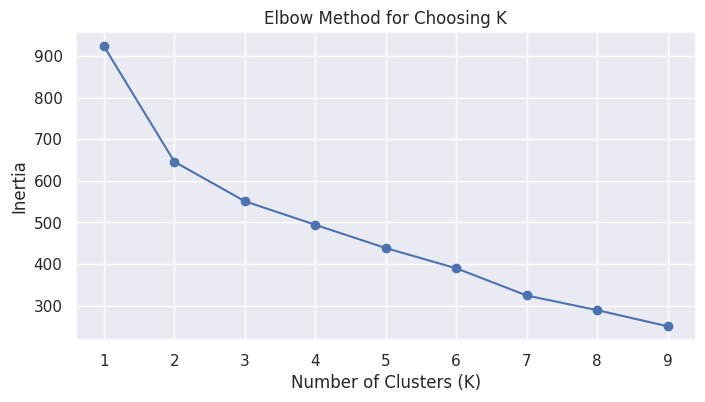

In [55]:
# Drop non-numeric columns before scaling
numeric_df = merged_df.select_dtypes(include=["number"]).copy()

# Scale the data
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(numeric_df)

# Use Elbow Method to choose number of clusters
inertia = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(cluster_scaled)
    inertia.append(km.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Choosing K")
plt.show()


After we have applied the elbow method, we noticed that the curve begins to plateau at K = 3, which shows that the data naturally clusters into three groups. From this, we selected K = 3 as the number of groups for our clustering model. In the next step, we'll apply K-Means with this value, label each data point with its cluster assignment, and use PCA to visualize the clusters in two dimensions. We'll also calculate the average crime and migration statistics for each group to understand what characterizes each cluster.

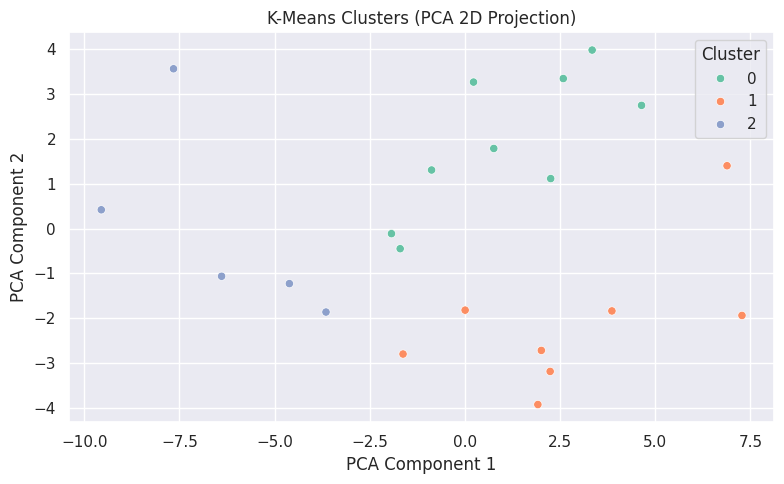


Average Feature Values by Cluster:

         Abduction  Abortion  Aggravated rape  Burglary  Child trafficking  \
Cluster                                                                      
0             8.44     68.78           662.78   1240.67               1.44   
1             6.62     70.88           620.88   1309.25               1.38   
2             6.80     66.20           537.00   1077.00               0.20   

         Corruption of minors  Counterfeiting  \
Cluster                                         
0                      261.44         1338.78   
1                      251.62         1228.75   
2                      204.20         1171.60   

         Crimes committed by public officials  Dispossession  \
Cluster                                                        
0                                     1824.67        2715.11   
1                                     1824.62        2675.50   
2                                     1572.80        2276.80   

     

In [56]:
# Apply KMeans with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(cluster_scaled)

# Add cluster labels to the original numeric_df
numeric_df["Cluster"] = labels

# Use PCA to reduce to 2D for plotting
pca = PCA(n_components=2)
pca_result = pca.fit_transform(cluster_scaled)

# Plot clusters in 2D
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels, palette="Set2")
plt.title("K-Means Clusters (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# Show average profile for each cluster
cluster_means = numeric_df.groupby("Cluster").mean().round(2)
print("\nAverage Feature Values by Cluster:\n")
print(cluster_means)


**Interpreting the results**

The cluster output resulted in three profiles of months in terms of their crime and migration characteristics. One cluster outlined months with extreme crime and the largest number of migrants, which were identified specifically by political corruption and property crimes. The second cluster also showed higher crime, but with slightly lower migration, possibly due to policy changes at the border or for deterrent purposes. The third group combined months with declining crime and declining migration, which arrived sooner during the year. These results confirm our earlier findings: certain types of crime—specifically crimes of or against public officials or personal security—track jumps in migration. Clustering gave a helpful unsupervised observation, showing that unlabeled, the data naturally forms important categories that are related to our research questions about how crime and overall social trends affect migration patterns.

**Identifying Key Factors Behind High Migration Months With Classification**

In order to contribute to our analysis and to introduce a third machine learning approach, we applied a classification model to predict if a particular month would be a high or low migration month. The regression model predicts the real number of migrations, while classification allows us to simplify the issue to a yes/no solution. By defining the task this way, we intended to find which specific crimes or seasonal factors most distinguish "high migration" months from all other months. Not only does this make our modeling more heterogeneous but also presents another angle from which to assess conditions likely to generate spikes in migration.

In [57]:
# Create binary classification label: High vs Low Migration (median split)
median_migration = merged_df["Total Encounters"].median()
merged_df["HighMigration"] = (merged_df["Total Encounters"] > median_migration).astype(int)


merged_ml_df = pd.get_dummies(merged_df, columns=["Season"], drop_first=True)

# Set up features and target
X = merged_ml_df.drop(columns=["Date", "Total Encounters", "HighMigration"])
y = merged_df["HighMigration"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Feature importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop Predictive Features:\n")
print(importances.head(10))


Classification Report:

              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       0.00      0.00      0.00         3

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5


Top Predictive Features:

Robbery                                 0.073984
Abduction                               0.071391
Other crimes against society            0.060468
Crimes committed by public officials    0.057835
Feminicide                              0.052251
Child trafficking                       0.043784
Sexual abuse                            0.033531
Dispossession                           0.033332
Fraud                                   0.030575
Drug trafficking (small-scale)          0.030472
dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Interpreting the results**

The model performed poorly with respect to accuracy, only being able to hit 40% accuracy on the test set, with precision and recall both sitting at 0.00 for the "high migration" class. This results in the model never getting any of the actually high migration months correct, and never even making a single prediction of that label. These issues likely arise because the test set was incredibly small (only 5 data points) and because of class imbalance, where high and low migration months were not evenly represented. Despite these reservations, the model did still yield useful insight in the form of its feature importance scores. Robbery, kidnapping, corruption by public officials, and feminicide were a few of the strongest predictors — capturing the trends that we observed in our regression model. This consistency prevails even when the predictions of the model were not perfect, that the underlying trends are still strong: individual safety risks and structural factors are strong determinants of migration. So despite the limitations in the performance of the classifier, it still helped us confirm our earlier findings and answer our broader research questions.

# Data Visualization of ML Models

The following visualizations show the result of running linear regression, namely on the four most frequent types of crime: robbery, injuries, homicide, and kidnapping. A heatmap between these four incidents of crime, as well as month and year, is displayed below.

<Figure size 2000x1200 with 0 Axes>

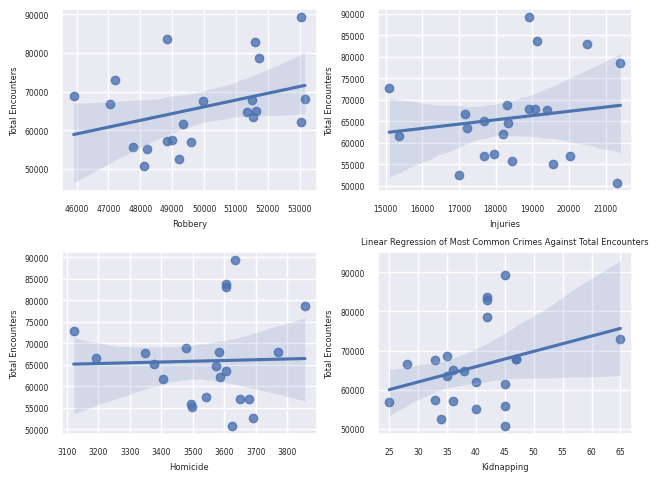

Text(0.5, 1.0, 'Correlation Heatmap')

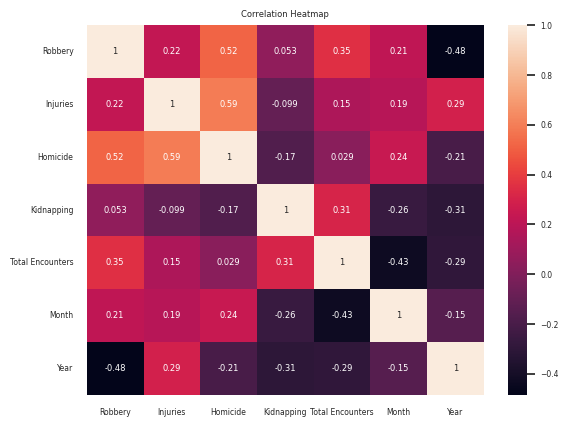

<Figure size 1200x800 with 0 Axes>

In [58]:
sns.set(font_scale=0.5)

plt.figure(figsize=(20,12))
fig, ax = plt.subplots(2, 2)
sns.regplot(data=merged_df, x='Robbery', y='Total Encounters', ax=ax[0][0])
sns.regplot(data=merged_df, x='Injuries', y='Total Encounters', ax=ax[0][1])
sns.regplot(data=merged_df, x='Homicide', y='Total Encounters', ax=ax[1][0])
sns.regplot(data=merged_df, x='Kidnapping', y='Total Encounters', ax=ax[1][1])
plt.title('Linear Regression of Most Common Crimes Against Total Encounters')
plt.tight_layout()
plt.show()


merged_encoded = merged_df[['Robbery','Injuries','Homicide', 'Kidnapping', 'Total Encounters','Month','Year']]
correlation_matrix = merged_encoded.corr()

heatmap = sns.heatmap(data=merged_encoded.corr(), annot=True)
plt.figure(figsize=(12, 8))
heatmap.set_title('Correlation Heatmap')



# Insights and Conclusions
Through using three different machine learning models, we have revealed insights that help us answer the relationship between Mexican crime and U.S. border control encounters of Mexican citizens.

After creating a linear regression model to determine the relationship between the types of crime in Mexico and border encounters of Mexican nationals, we've revealed that specific types of crimes in Mexico correlate with the Mexican border encounters on the U.S. border. Specifically, crimes committed by public officials, crimes against heritage or property, and burglary appear to have the greatest influence on these border encounters. Considering the historical and political context behind the U.S. and Mexican border, our group interpreted these correlations as changes in undocumented migration patterns to the U.S. Additionally, the crimes with the greatest correlations further support this interpretation. The civil/political unrest caused by public officials committing crimes provides motive for Mexican nationals to seek better opportunities in a neighboring country. Crimes against heritage/race or property also act as a push factor for Mexican nationals to migrate to another country that has many Mexican communities (the United States) to escape these security threats.

Utilizing another regression model, we attempted to find any correlation between seasonal tendencies and U.S. border encounters of Mexican nationals. After training, we noticed the weak trends that the seasons had. Relative to the different crime types, there appears to be little to no correlation between the two. Though there may not be a strong correlation, the result can still provide insights on the effects of non-seasonal factors on border encounters. Rather than undocumented migration due to easier weather conditions/patterns, other factors such as crime rates and government policy play a much larger role in the undocumented immigration to the U.S. This can imply undocumented migration of Mexicans to the U.S. is based on dire necessity rather than long-term planning or luxury.

Incorporating K-means clustering, we then attempted to find potential groups based on crime rate patterns and border encounters. While the use of PCA does introduce some obscurity to the clusters formed, there are some highlights in each group. The first group appeared to group months with extreme crime and a larger number of Mexican border encounters. The next group also had high crime with a slightly lower migration, while the last group clustered months with declining crime and declining migration encounters. The intracluster distance among the clusters varied. However, clusters 0d 1 (clusters that tended to have high crime and border encounters) appeared to be more distinct, corroborating the connection between crime frequency and migration patterns or border encounters.

Our final ML model involved random forest classification in an attempt to see if we could predict whether a particular month would have higher or lower Mexican migration encounters. Training the model, our group realized the poor performance it had on the training set. In particular, the model struggled to classify high-encounter months, likely due to the lack of data and class imbalances. Even with poor accuracy, the model still deemed robbery, kidnapping, and corruption by public officials as its strongest predictors, aligning with the insights of our regression model.

By using various ML models, we have extracted valuable insights into Mexican crime and encounters of undocumented Mexicans at the border. First, there exists some correlation between the amount of crime and the number of border encounters or migration patterns, as seen in our second regression model and K-means clustering model. Next, the frequency of specific crimes also correlates with the amount of border encounters. Specifically, crimes associated with civic/political unrest (crimes committed by public officials) had a significant relationship with these encounters.

After reviewing these insights, it is clear that undocumented migration encounters of Mexican nationals are complex, involving factors beyond solely seasons or crimes. Rather, these results highlight the influence of policy and civil unrest on Mexican encounters. Due to the broad impact of Mexican policy, our models couldn't properly capture the trends in border encounters.

Ultimately, Mexican policymakers must recognize the connectedness of crime, civil unrest, and migration to address undocumented migration rather than solely focusing on border enforcement. By tackling corruption, improving economic opportunities, and ensuring public safety, Mexico can influence these migration patterns, which increase stability and security for its citizens.